<a href="https://colab.research.google.com/github/SirimarcoUERJ/MachineLearning/blob/main/KNN_Census(SemEscalonamento).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN na Base Census Sem Usar Escalonamento no Tratamento dos Dados.**

In [3]:
from google.colab import drive
import pickle as pkl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [4]:
drive.mount("/content/drive")
arq = "/content/drive/MyDrive/Colab Notebooks/Machine Learn/data/census(SemEscalonar).pkl"

Mounted at /content/drive


In [5]:
with open(arq, "rb") as f:
  x_treino, y_treino, x_teste, y_teste = pkl.load(f)

In [6]:
x_treino.shape, y_treino.shape

((27676, 108), (27676,))

In [7]:
x_teste.shape, y_teste.shape

((4885, 108), (4885,))

In [21]:
knn_censusSE = KNeighborsClassifier(n_neighbors=40, metric="minkowski", p=2)
knn_censusSE.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=40)

In [22]:
previsoes = knn_censusSE.predict(x_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [23]:
y_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [24]:
accuracy_score(y_teste, previsoes) #nesse caso a falta do escalonamento diminuio o % de acerto porem n foi algo muito expressivo .

0.7952917093142272

0.7952917093142272

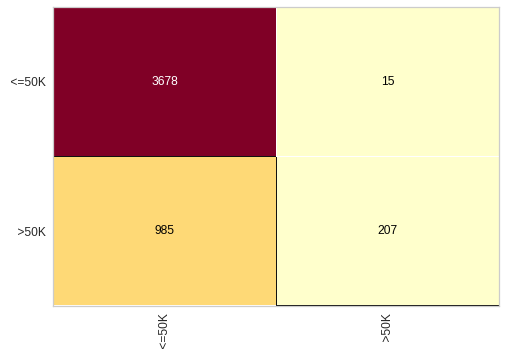

In [25]:
cm = ConfusionMatrix(knn_censusSE)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [26]:
print(classification_report(y_teste, previsoes)) #olhando os dados consguimos perceber que ele erra muito mais , a taxa de acertos só não cai muito devido a base de dados ser muito desbalanceada para pessoas q ganham mais de 50k

              precision    recall  f1-score   support

       <=50K       0.79      1.00      0.88      3693
        >50K       0.93      0.17      0.29      1192

    accuracy                           0.80      4885
   macro avg       0.86      0.58      0.59      4885
weighted avg       0.82      0.80      0.74      4885

